# Bayes classifier-Unimodal Gaussian density 

##  Covariance matrix is diagonal and is different for each class

### decision plot with training data

Test accuracy: 89.75%


C:\Users\raksh\AppData\Local\Temp\ipykernel_12484\2355852129.py:84: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(class_data[:, 0], class_data[:, 1], label=f'Class {c}', edgecolors='k', marker='o', cmap=plt.cm.Paired)


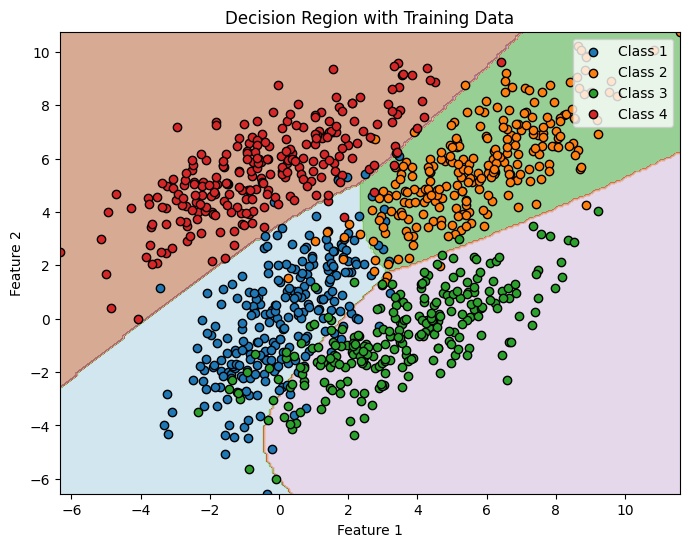

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load data (replace with correct file paths)
train_data = np.loadtxt(r'C:\Users\raksh\IML-project-dec-2024\classification_datasets\overlapping\combined_dataset_train.txt')
test_data = np.loadtxt(r'C:\Users\raksh\IML-project-dec-2024\classification_datasets\overlapping\combined_dataset_test.txt')
val_data = np.loadtxt(r'C:\Users\raksh\IML-project-dec-2024\classification_datasets\overlapping\combined_dataset_val.txt')

# Separate features and labels
X_train = train_data[:, :-1]
y_train = train_data[:, -1].astype(int)  # Ensure labels are integers
X_test = test_data[:, :-1]
y_test = test_data[:, -1].astype(int)  # Ensure labels are integers
X_val = val_data[:, :-1]
y_val = val_data[:, -1].astype(int)  # Ensure labels are integers

# Number of classes (4 classes, labels 1 to 4)
num_classes = 4
dim = X_train.shape[1]

# Estimate parameters (mean and covariance) for each class
means = np.zeros((num_classes, dim))
covariances = np.zeros((num_classes, dim, dim))
priors = np.zeros(num_classes)

# Estimate parameters for each class
for c in range(1, num_classes + 1):  # Classes are 1, 2, 3, 4
    # Get data for class c
    X_c = X_train[y_train == c]
    
    # Mean for class c
    means[c-1] = np.mean(X_c, axis=0)
    
    # Covariance matrix for class c
    covariances[c-1] = np.cov(X_c, rowvar=False)
    
    # Regularize covariance matrices to avoid singularity issues
    covariances[c-1] += np.eye(dim) * 1e-6
    
    # Prior for class c
    priors[c-1] = len(X_c) / len(X_train)

# Gaussian likelihood function
def gaussian(x, mean, cov):
    d = len(x)
    diff = x - mean
    return (1 / np.sqrt((2 * np.pi) ** d * np.linalg.det(cov))) * \
           np.exp(-0.5 * diff.T @ np.linalg.inv(cov) @ diff)

# Bayes Classifier
def predict(X):
    predictions = []
    for x in X:
        probs = np.zeros(num_classes)
        for c in range(num_classes):
            likelihood = gaussian(x, means[c], covariances[c])
            posterior = likelihood * priors[c]
            probs[c] = posterior
        predictions.append(np.argmax(probs) + 1)  # Add 1 to get the correct class label
    return np.array(predictions)

# Predict on test data
y_pred = predict(X_test)

# Calculate accuracy
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f'Test accuracy: {accuracy * 100:.2f}%')

# Decision region plot
xx, yy = np.meshgrid(np.linspace(min(X_train[:, 0]), max(X_train[:, 0]), 200),
                     np.linspace(min(X_train[:, 1]), max(X_train[:, 1]), 200))

# Predict the class for each point in the grid
Z = predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision region
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.Paired)

# Plot training data with different colors for each class
for c in range(1, num_classes + 1):
    class_data = X_train[y_train == c]
    plt.scatter(class_data[:, 0], class_data[:, 1], label=f'Class {c}', edgecolors='k', marker='o', cmap=plt.cm.Paired)

# Add legend to show class labels
plt.legend(title='Classes')
plt.title("Decision Region with Training Data")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper right')
plt.show()


### Decision plot with testing data

C:\Users\raksh\AppData\Local\Temp\ipykernel_12484\3387070487.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(class_data[:, 0], class_data[:, 1], label=f'Class {c}', edgecolors='k', marker='o', cmap=plt.cm.Paired)


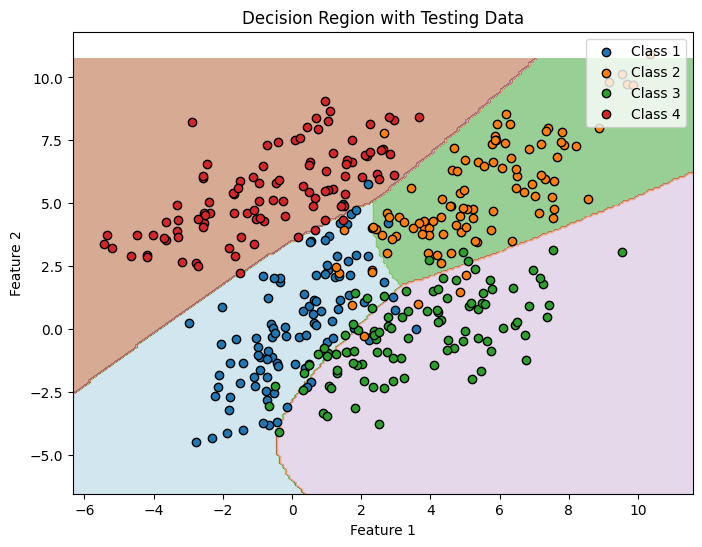

In [2]:
# Plot the decision region
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.Paired)

# Plot training data with different colors for each class
for c in range(1, num_classes + 1):
    class_data = X_test[y_test == c]
    plt.scatter(class_data[:, 0], class_data[:, 1], label=f'Class {c}', edgecolors='k', marker='o', cmap=plt.cm.Paired)

# Add legend to show class labels
plt.legend(title='Classes')

plt.title("Decision Region with Testing Data")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper right')
plt.show()

### Decision region plot for every pair of classes with the respective training data superimposed 

C:\Users\raksh\AppData\Local\Temp\ipykernel_12484\2104676224.py:75: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(class_points[:, 0], class_points[:, 1], label=f'Class {c}', edgecolors='k', marker='o', cmap=plt.cm.Paired)


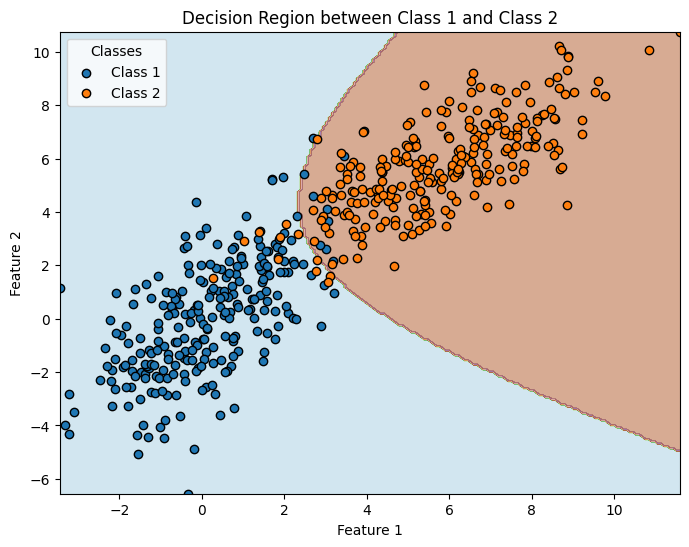

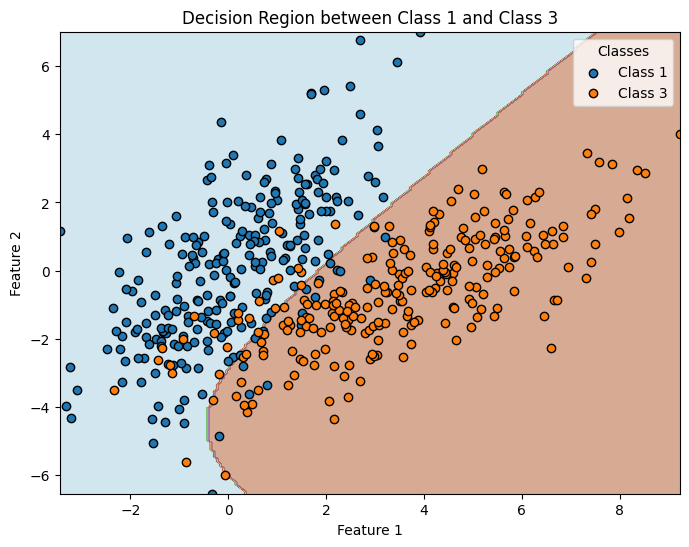

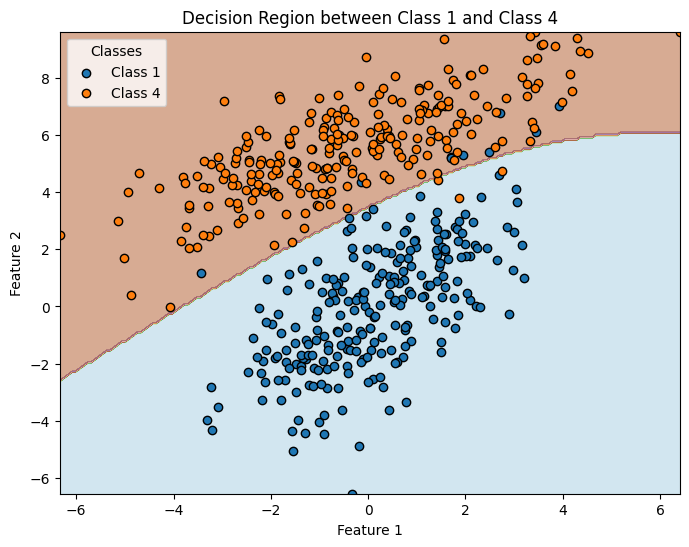

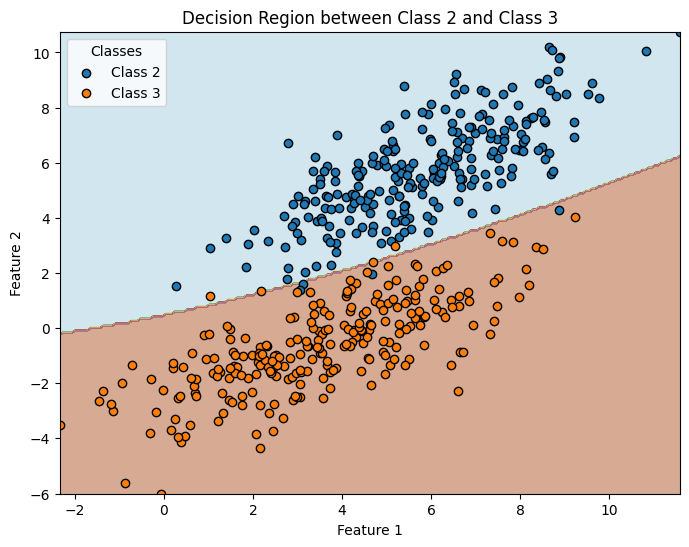

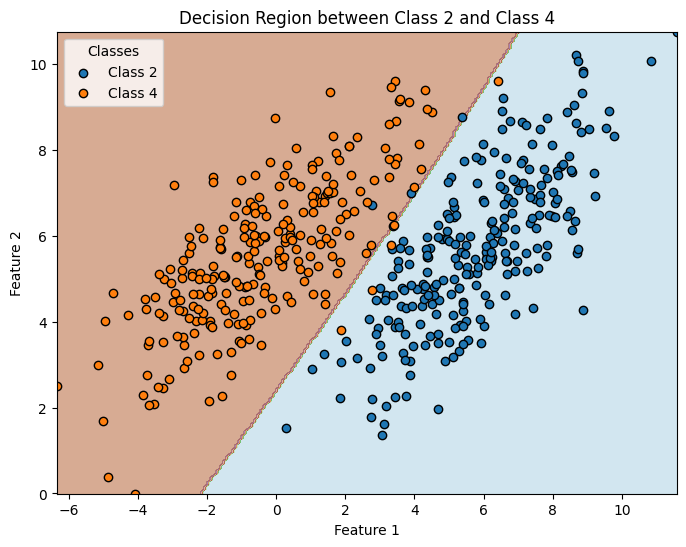

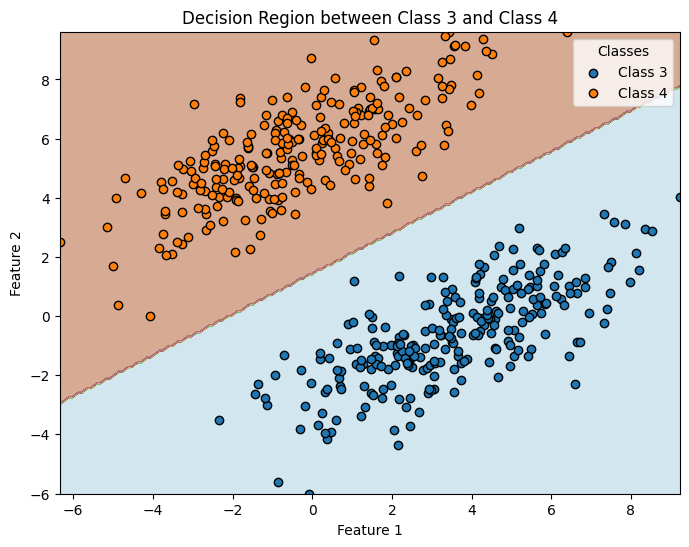

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Separate features and labels
X_train = train_data[:, :-1]
y_train = train_data[:, -1].astype(int)  # Ensure labels are integers

# Number of classes (4 classes, labels 1 to 4)
num_classes = 4
dim = X_train.shape[1]

# Estimate parameters (mean and covariance) for each class
means = np.zeros((num_classes, dim))
covariances = np.zeros((num_classes, dim, dim))
priors = np.zeros(num_classes)

# Estimate parameters for each class
for c in range(1, num_classes + 1):  # Classes are 1, 2, 3, 4
    # Get data for class c
    X_c = X_train[y_train == c]
    
    # Mean for class c
    means[c-1] = np.mean(X_c, axis=0)
    
    # Covariance matrix for class c
    covariances[c-1] = np.cov(X_c, rowvar=False)
    
    # Regularize covariance matrices to avoid singularity issues
    covariances[c-1] += np.eye(dim) * 1e-6
    
    # Prior for class c
    priors[c-1] = len(X_c) / len(X_train)

# Gaussian likelihood function
def gaussian(x, mean, cov):
    d = len(x)
    diff = x - mean
    return (1 / np.sqrt((2 * np.pi) ** d * np.linalg.det(cov))) * \
           np.exp(-0.5 * diff.T @ np.linalg.inv(cov) @ diff)

# Bayes Classifier
def predict(X, class_1, class_2):
    predictions = []
    for x in X:
        probs = np.zeros(2)
        for idx, c in enumerate([class_1, class_2]):
            likelihood = gaussian(x, means[c-1], covariances[c-1])
            posterior = likelihood * priors[c-1]
            probs[idx] = posterior
        predictions.append(np.argmax(probs) + 1)  # Add 1 to get the correct class label
    return np.array(predictions)

# Create decision region plots for every pair of classes
for c1 in range(1, num_classes + 1):
    for c2 in range(c1 + 1, num_classes + 1):  # Only plot pairs (c1, c2) with c1 < c2
        # Select data for classes c1 and c2
        class_data = X_train[(y_train == c1) | (y_train == c2)]
        class_labels = y_train[(y_train == c1) | (y_train == c2)]

        # Create a mesh grid for plotting decision boundaries
        xx, yy = np.meshgrid(np.linspace(min(class_data[:, 0]), max(class_data[:, 0]), 200),
                             np.linspace(min(class_data[:, 1]), max(class_data[:, 1]), 200))

        # Predict the class for each point in the grid
        Z = predict(np.c_[xx.ravel(), yy.ravel()], c1, c2)
        Z = Z.reshape(xx.shape)

        # Plot decision region
        plt.figure(figsize=(8, 6))
        plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.Paired)

        # Plot training data for classes c1 and c2
        for c in [c1, c2]:
            class_points = class_data[class_labels == c]
            plt.scatter(class_points[:, 0], class_points[:, 1], label=f'Class {c}', edgecolors='k', marker='o', cmap=plt.cm.Paired)

        # Add legend
        plt.legend(title='Classes')

        # Add labels and title
        plt.title(f"Decision Region between Class {c1} and Class {c2}")
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')

        # Show the plot
        plt.show()


### Evaluation metrics

In [4]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Number of classes (4 classes: 1, 2, 3, 4)
num_classes = 4

# Initialize lists to store the parameters
means = []
covariances = []
priors = []

# Calculate the mean, covariance, and prior for each class
for class_label in range(1, num_classes + 1):
    # Get the data points for the current class
    class_data = X_train[y_train == class_label]
    
    # Calculate the mean and covariance matrix for the current class
    mean = np.mean(class_data, axis=0)
    covariance = np.cov(class_data, rowvar=False)
    
    # Calculate the prior for the current class
    prior = len(class_data) / len(X_train)
    
    # Append the results to the lists
    means.append(mean)
    covariances.append(covariance)
    priors.append(prior)

# Convert the lists to numpy arrays for easier handling
means = np.array(means)
covariances = np.array(covariances)
priors = np.array(priors)


# Define the Gaussian PDF
def gaussian(x, mean, cov):
    d = len(mean)
    diff = x - mean
    exponent = -0.5 * diff.T @ np.linalg.inv(cov) @ diff
    denominator = np.sqrt((2 * np.pi) ** d * np.linalg.det(cov))
    return np.exp(exponent) / denominator

# Define the predict function for multi-class classification
def predict(X, means, covariances, priors):
    predictions = []
    for x in X:
        probs = np.zeros(len(means))
        for i in range(len(means)):
            likelihood = gaussian(x, means[i], covariances[i])
            posterior = likelihood * priors[i]
            probs[i] = posterior
        predictions.append(np.argmax(probs) + 1)  # Add 1 to get the correct class label
    return np.array(predictions)

# Get the predicted values for the test data
y_pred = predict(X_test, means, covariances, priors)

# Compute precision, recall, and F-measure for each class
precision = precision_score(y_test, y_pred, average=None, labels=[1, 2, 3, 4])
recall = recall_score(y_test, y_pred, average=None, labels=[1, 2, 3, 4])
f1 = f1_score(y_test, y_pred, average=None, labels=[1, 2, 3, 4])

# Compute mean precision, recall, and F-measure
mean_precision = np.mean(precision)
mean_recall = np.mean(recall)
mean_f1 = np.mean(f1)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display metrics in a table
metrics = {
    'Class': ['1', '2', '3', '4'],
    'Precision': precision,
    'Recall': recall,
    'F-Measure': f1
}

metrics_df = pd.DataFrame(metrics)

# Concatenate mean metrics to the table
mean_metrics_df = pd.DataFrame({
    'Class': ['Mean'],
    'Precision': [mean_precision],
    'Recall': [mean_recall],
    'F-Measure': [mean_f1]
})

# Concatenate the two DataFrames
metrics_df = pd.concat([metrics_df, mean_metrics_df], ignore_index=True)

# Print the table
print("Classification Metrics for Each Class:")
print(metrics_df)
print("\nAccuracy: {:.4f}".format(accuracy))


Classification Metrics for Each Class:
  Class  Precision  Recall  F-Measure
0     1   0.796460  0.9000   0.845070
1     2   0.956522  0.8800   0.916667
2     3   0.882979  0.8300   0.855670
3     4   0.970297  0.9800   0.975124
4  Mean   0.901564  0.8975   0.898133

Accuracy: 0.8975


### Confusion matrix

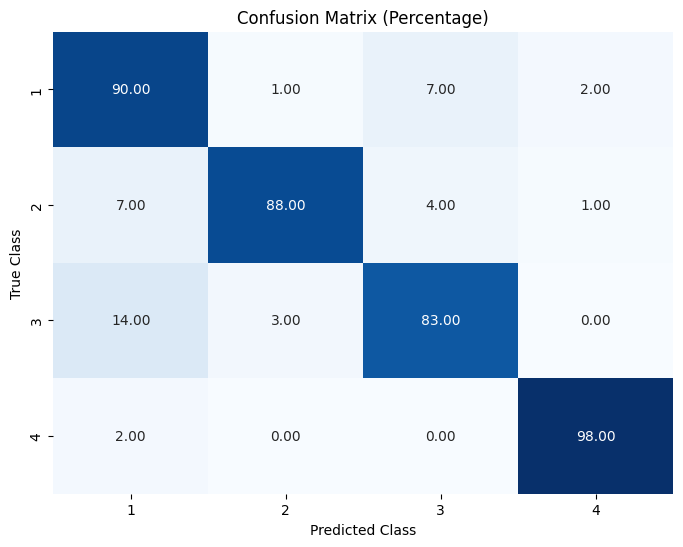

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming y_test and y_pred are already defined as the actual and predicted labels
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[1, 2, 3, 4])

# Normalize the confusion matrix to get percentages
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Blues', cbar=False, 
            xticklabels=['1', '2', '3', '4'], yticklabels=['1', '2', '3', '4'])

# Set plot labels and title
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix (Percentage)')

# Display the plot
plt.show()
